In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("nearest-earth-objects(1910-2024).csv")
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


EDA

In [42]:
print(df.head())


    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         Fals

In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB
None


In [44]:
print(df.describe())

             neo_id  absolute_magnitude  estimated_diameter_min  \
count  3.381990e+05       338171.000000           338171.000000   
mean   1.759939e+07           22.932525                0.157812   
std    2.287225e+07            2.911216                0.313885   
min    2.000433e+06            9.250000                0.000511   
25%    3.373980e+06           20.740000                0.025384   
50%    3.742127e+06           22.800000                0.073207   
75%    5.405374e+07           25.100000                0.189041   
max    5.446281e+07           33.580000               37.545248   

       estimated_diameter_max  relative_velocity  miss_distance  
count           338171.000000      338199.000000   3.381990e+05  
mean                 0.352878       51060.662908   4.153535e+07  
std                  0.701869       26399.238435   2.077399e+07  
min                  0.001143         203.346433   6.745533e+03  
25%                  0.056760       30712.031471   2.494540e+07  


In [45]:
print(df.describe(include=['object']))

                      name orbiting_body
count               338199        338199
unique               33514             1
top     277810 (2006 FV35)         Earth
freq                   211        338199


In [46]:
df.shape

(338199, 9)

In [47]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
df.isna().sum()* 100 / len(df)

neo_id                    0.000000
name                      0.000000
absolute_magnitude        0.008279
estimated_diameter_min    0.008279
estimated_diameter_max    0.008279
orbiting_body             0.000000
relative_velocity         0.000000
miss_distance             0.000000
is_hazardous              0.000000
dtype: float64

Resolving Null values

In [50]:
df.dropna(inplace=True)
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB


In [52]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381710e+05,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,1.760041e+07,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.287276e+07,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


Detecting outliers

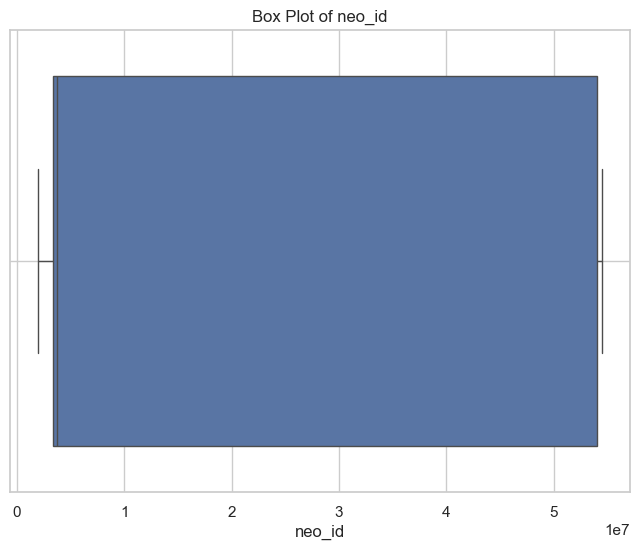

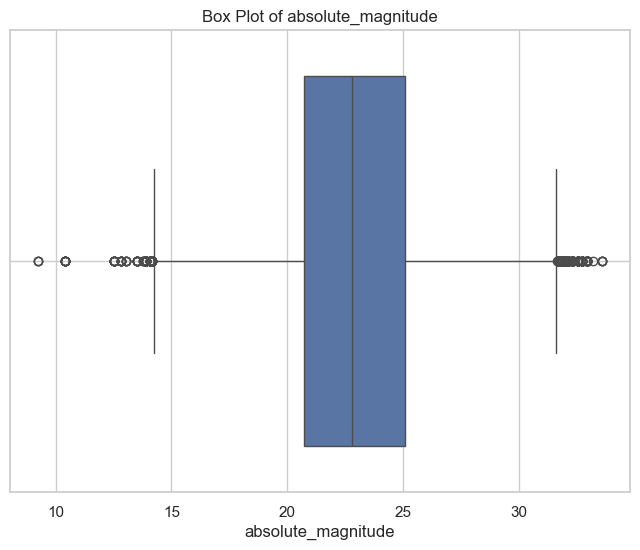

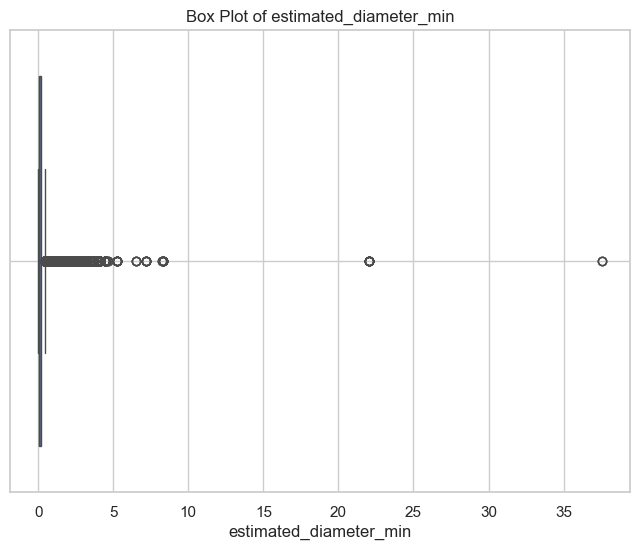

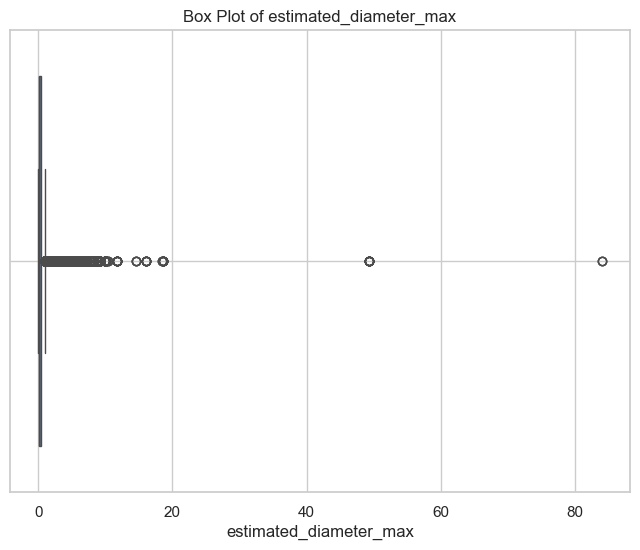

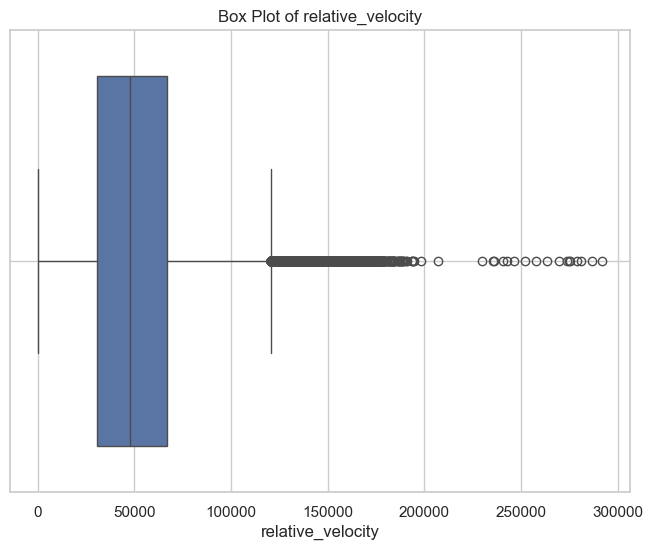

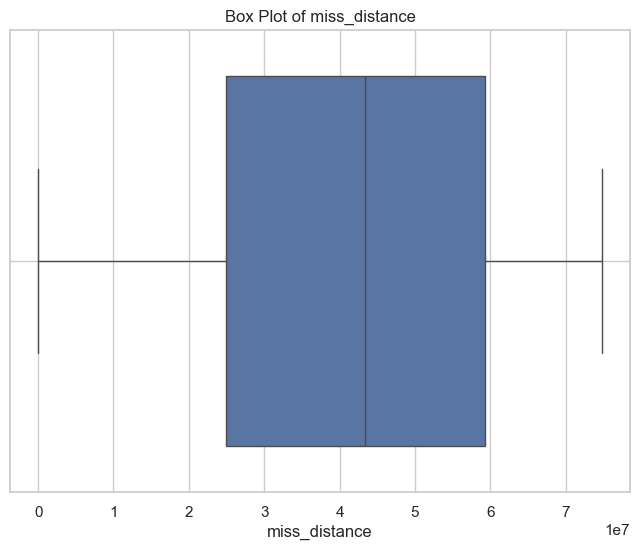

In [53]:

sns.set(style="whitegrid")

# Plotting box plots for numerical columns
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])  
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    
 
 
    
    plt.grid(True)  
    plt.show()
    
    

Hndling outliers

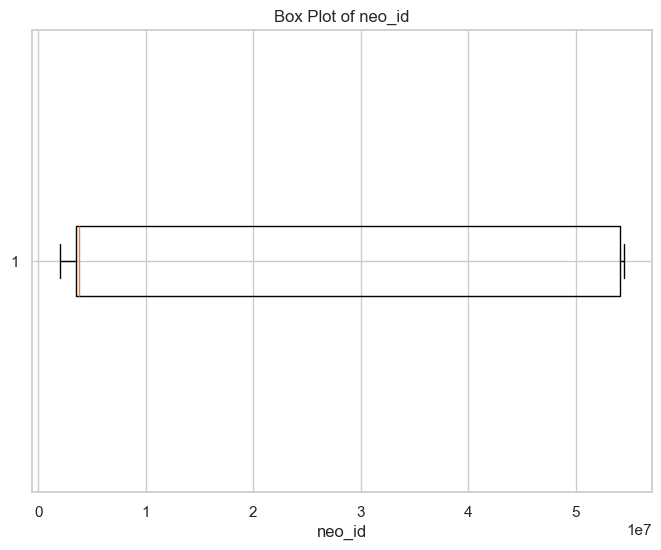

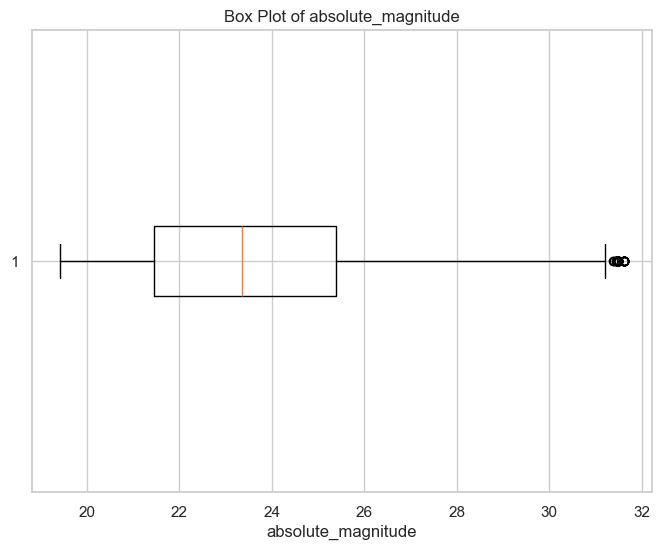

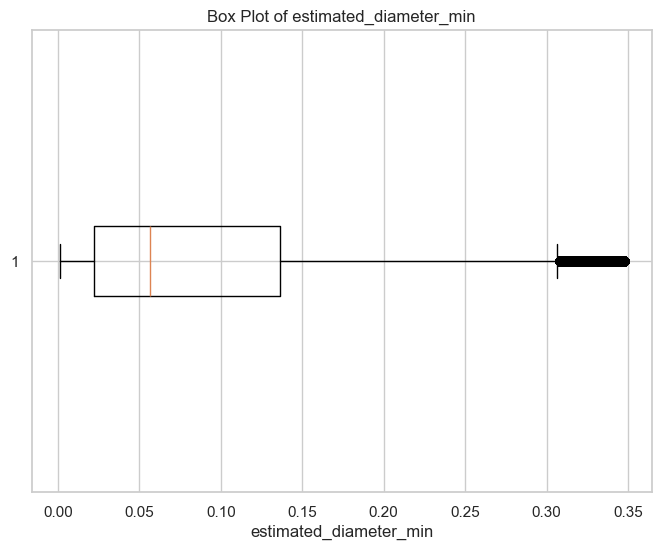

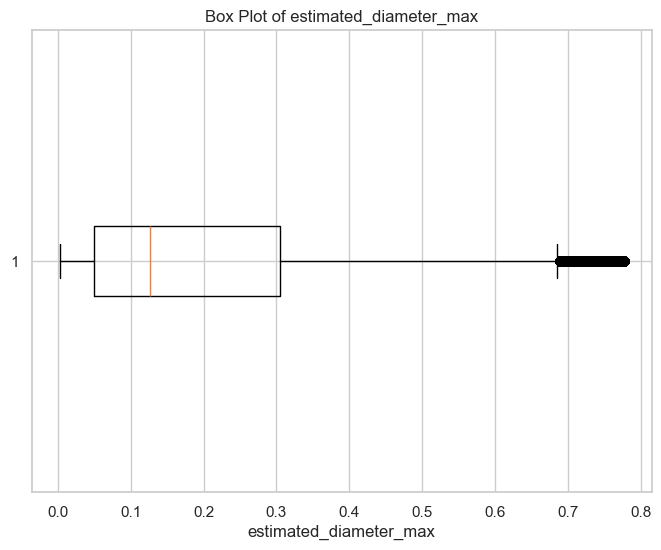

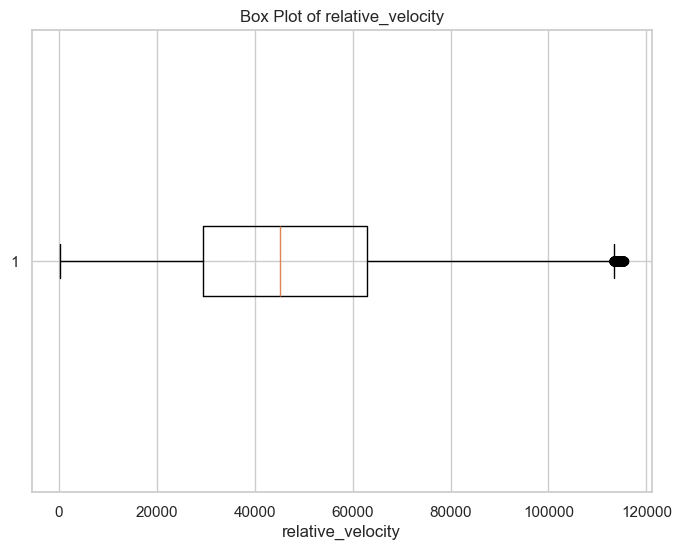

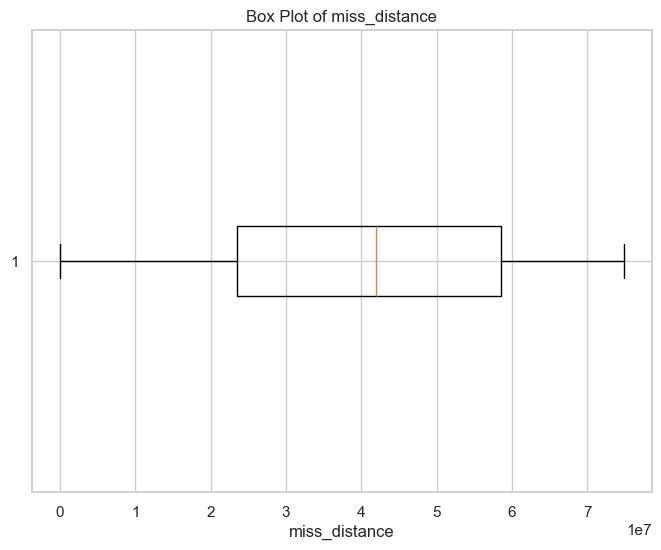

Original shape: (295768, 9)
New shape after removing outliers: (295768, 9)


In [54]:
# Function to handle outliers using the IQR method
def handle_outliers(df, column):
  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
   
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df




for col in df.select_dtypes(include=np.number).columns:
    df = handle_outliers(df, col)


for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col], vert=False)  
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# Check the new shape after removing outliers
print(f"Original shape: {df.shape}")
print(f"New shape after removing outliers: {df.shape}")


In [55]:
print("Summary statistics before outlier removal:")
print(df.describe(include=[np.number]))

# Reapply outlier handling if needed
df_cleaned = df.copy()
for col in df.select_dtypes(include=np.number).columns:
    df_cleaned = handle_outliers(df_cleaned, col)
    
print("Summary statistics after outlier removal:")
print(df_cleaned.describe(include=[np.number]))


Summary statistics before outlier removal:
             neo_id  absolute_magnitude  estimated_diameter_min  \
count  2.957680e+05       295768.000000           295768.000000   
mean   1.926521e+07           23.548486                0.089345   
std    2.351526e+07            2.493745                0.084844   
min    2.002340e+06           19.420000                0.001266   
25%    3.545973e+06           21.450000                0.022108   
50%    3.763621e+06           23.360000                0.056566   
75%    5.410425e+07           25.400000                0.136319   
max    5.446281e+07           31.610000                0.347180   

       estimated_diameter_max  relative_velocity  miss_distance  
count           295768.000000      295768.000000   2.957680e+05  
mean                 0.199782       47635.923929   4.054848e+07  
std                  0.189717       22971.416222   2.094713e+07  
min                  0.002832         203.346433   6.745533e+03  
25%                  0.

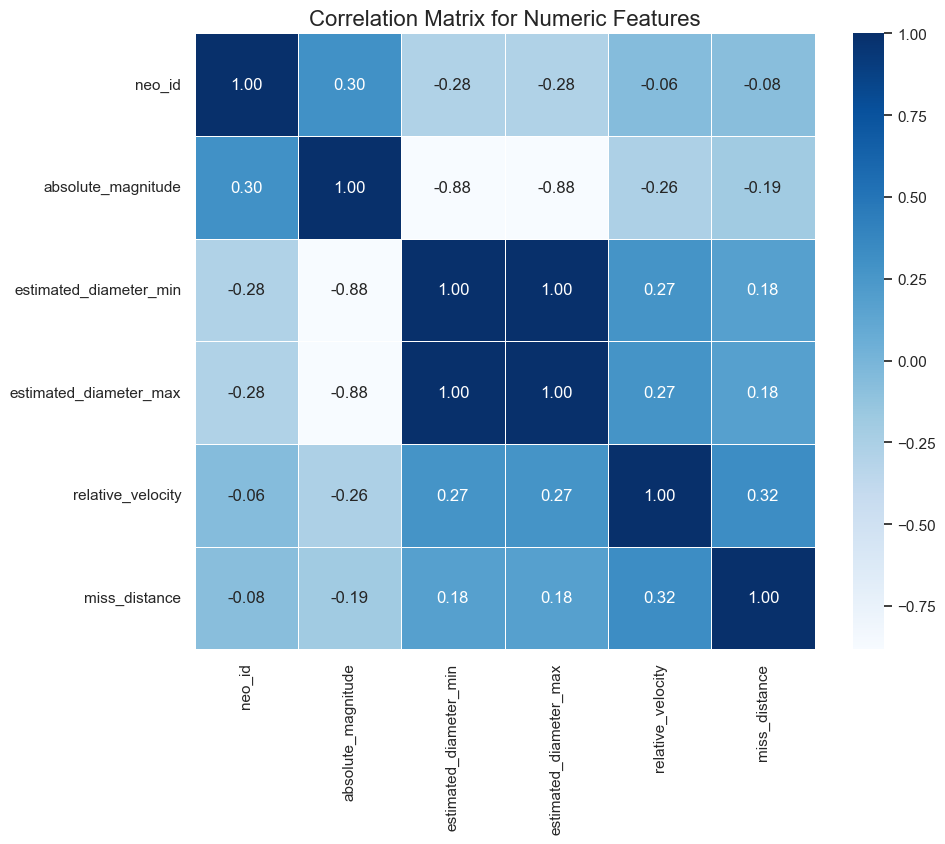

In [56]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix for Numeric Features', size=16)
plt.show()


Visualization

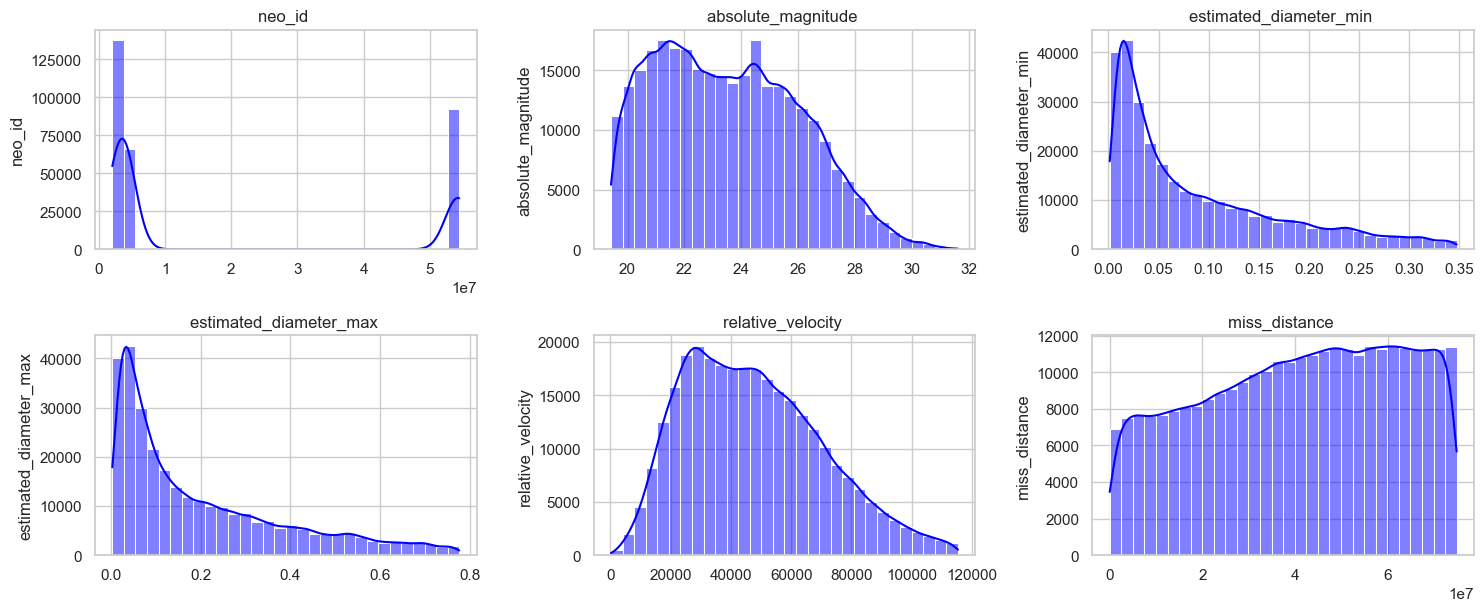

In [57]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='blue')
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()



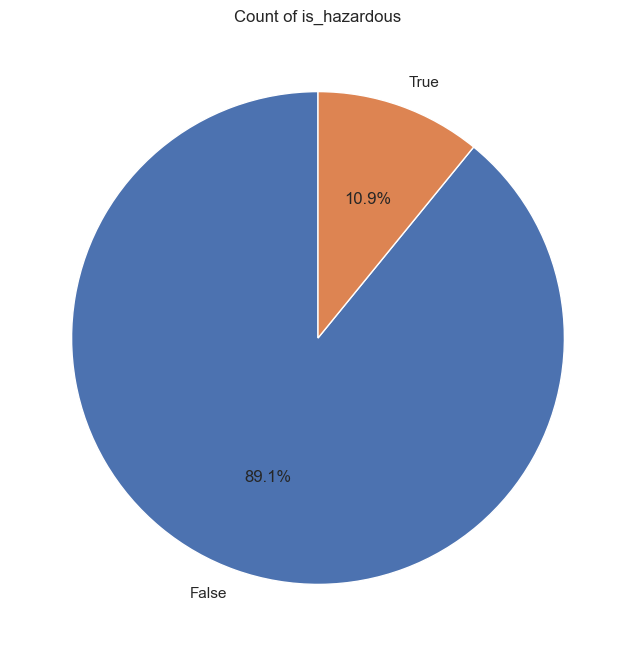

In [58]:
hazardous_counts = df['is_hazardous'].value_counts()

# Create the pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Count of is_hazardous')
plt.show()

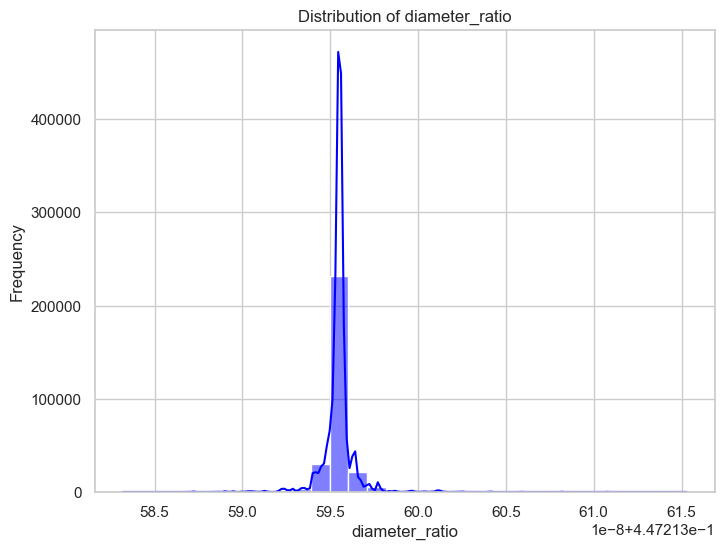

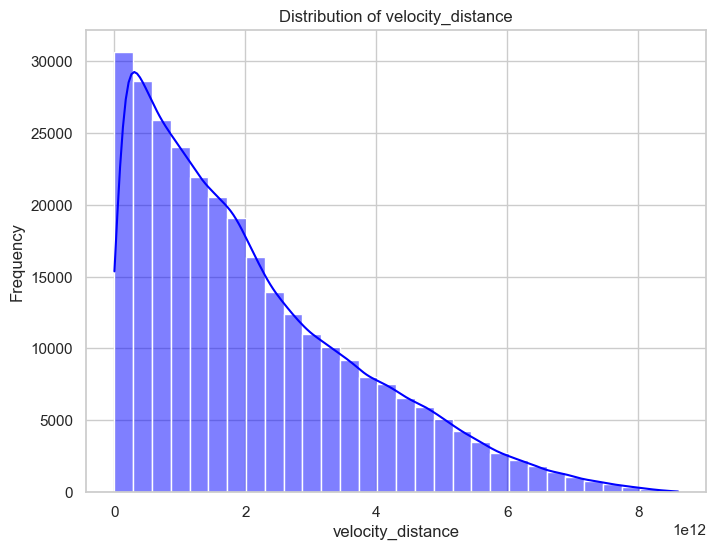

In [59]:
# Feature Engineering
df['diameter_ratio'] = df['estimated_diameter_min'] / df['estimated_diameter_max']
df['velocity_distance'] = df['relative_velocity'] * df['miss_distance']

# Plot histograms for diameter_ratio and velocity_distance
features_to_plot = ['diameter_ratio', 'velocity_distance']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


Feature Selection

In [60]:
X = df.drop(["neo_id", "name", "orbiting_body", "is_hazardous"], axis=1)

y = df["is_hazardous"]

Handle imbalanced data

In [61]:
somte = SMOTE(random_state=42)

X, y = somte.fit_resample(X, y)

y.value_counts()

is_hazardous
False    263579
True     263579
Name: count, dtype: int64

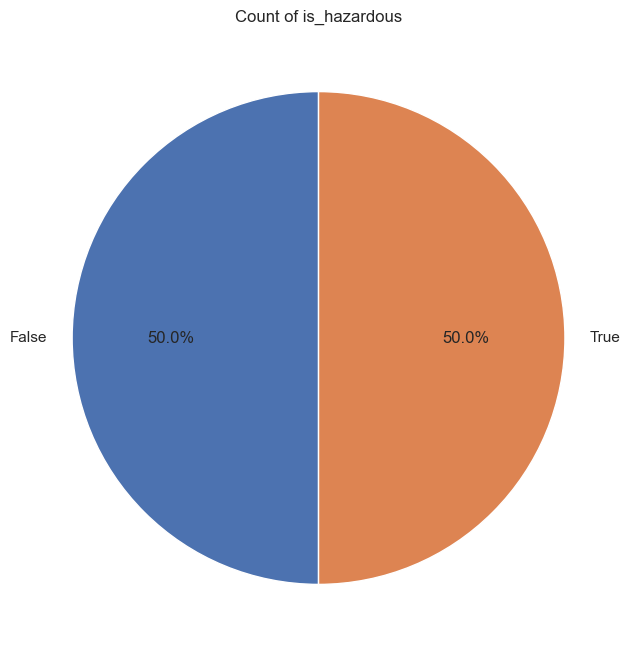

In [62]:
hazardous_counts = y.value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Count of is_hazardous')
plt.show()

Train test split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


Model building

In [64]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
RF_model_pred = RF_model.predict(x_test)

In [66]:
print(classification_report(y_test, RF_model_pred))

              precision    recall  f1-score   support

       False       0.96      0.94      0.95     52699
        True       0.94      0.96      0.95     52733

    accuracy                           0.95    105432
   macro avg       0.95      0.95      0.95    105432
weighted avg       0.95      0.95      0.95    105432



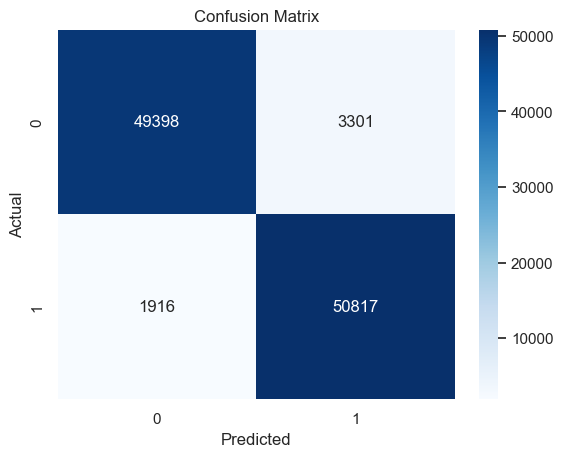

In [67]:
cm = confusion_matrix(y_test, RF_model_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [68]:
print("Acc is: {} %".format(accuracy_score(RF_model_pred, y_test) * 100))

Acc is: 95.05178693375825 %


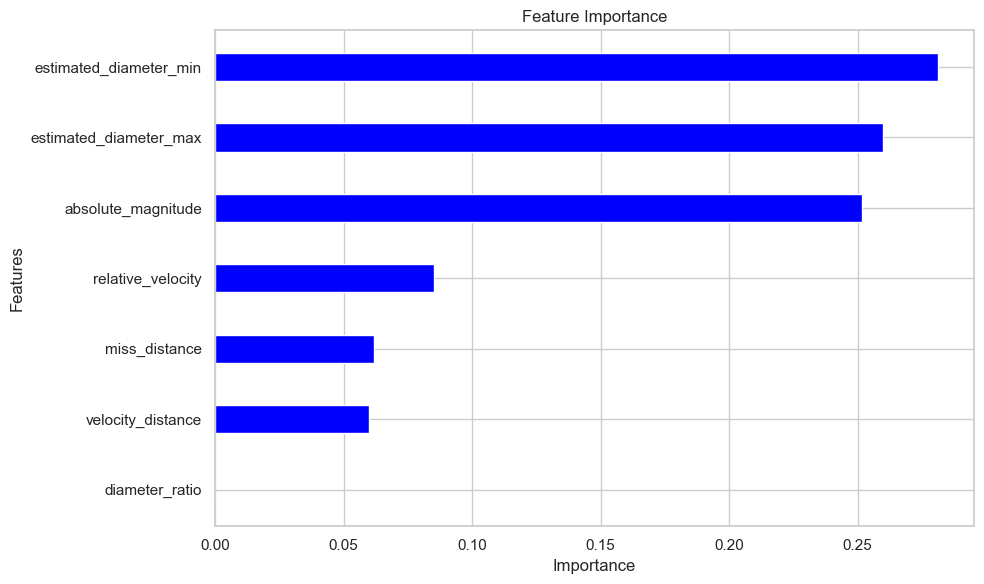

In [70]:
feature_importances = RF_model.feature_importances_
feature_names = x_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(importance_df['Feature'], importance_df['Importance'], color='blue', height=0.4)
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importance')
plt.tight_layout()
plt.show()

learning curve

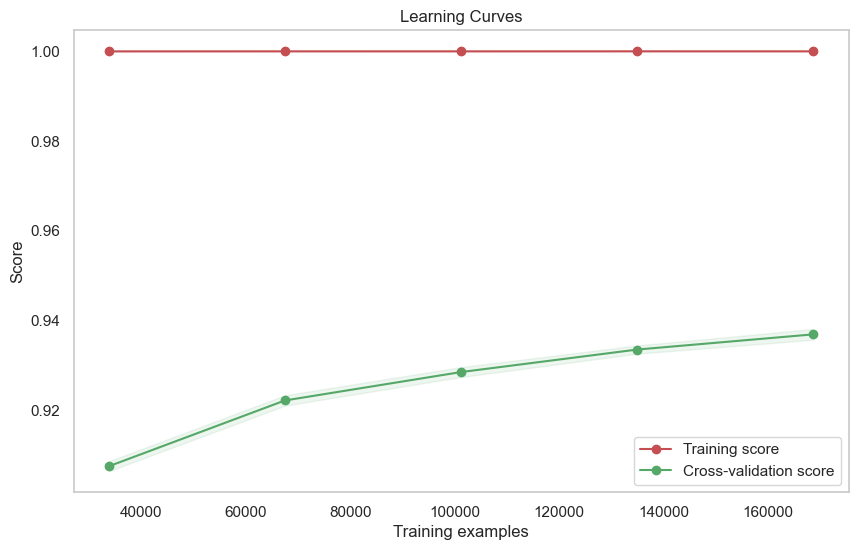

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier  # or your chosen classifier



train_sizes, train_scores, test_scores = learning_curve(
    RF_model, x_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 0.5, 5), random_state=42
)



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()
